In [1]:
# load modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# load data
df = pd.read_csv('cleaned_secondary_school_dropout_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62739 entries, 0 to 62738
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location_name      62739 non-null  object
 1   home_language      62739 non-null  object
 2   hh_occupation      62739 non-null  object
 3   hh_edu             3161 non-null   object
 4   hh_size            62739 non-null  object
 5   school_distanceKm  62739 non-null  object
 6   age                62739 non-null  int64 
 7   gender             62739 non-null  object
 8   mothers_edu        30730 non-null  object
 9   grade              62739 non-null  object
 10  meansToSchool      62739 non-null  object
 11  hh_children        62739 non-null  object
 12  dropout            62739 non-null  object
dtypes: int64(1), object(12)
memory usage: 6.2+ MB


In [5]:
df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,Unemployed,Secondary,More than five,1-2 km,11,Male,Primary,Form Two,Walk,More than five,No
1,Urban,English,Unemployed,Primary,More than five,2-3 km,11,Male,Primary,Form One,Walk,More than five,Yes
2,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11,Female,Secondary,Form Two,Public transport,More than five,No
3,Urban,Kiswahili,Unemployed,Secondary,More than five,More than 11 km,11,Male,Primary,Form One,Walk,Five Children,No
4,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11,Female,Secondary,Form One,Public transport,More than five,No


In [6]:
target_column = 'dropout'
X = df.drop(columns=[target_column])
y = df[target_column]

In [7]:
# Encode categorical variables
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, shuffle=True)

Accuracy: 0.9457284029327383
Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.97      0.97     11354
         Yes       0.73      0.68      0.71      1194

    accuracy                           0.95     12548
   macro avg       0.85      0.83      0.84     12548
weighted avg       0.94      0.95      0.94     12548



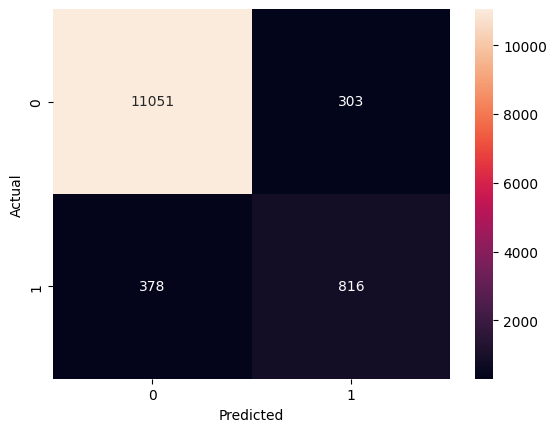

In [8]:
# Choose a classification algorithm (Random Forest is used here as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
from sklearn.svm import SVC

Accuracy: 0.9432578897035384
Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.97      0.97     11354
         Yes       0.70      0.70      0.70      1194

    accuracy                           0.94     12548
   macro avg       0.84      0.83      0.83     12548
weighted avg       0.94      0.94      0.94     12548



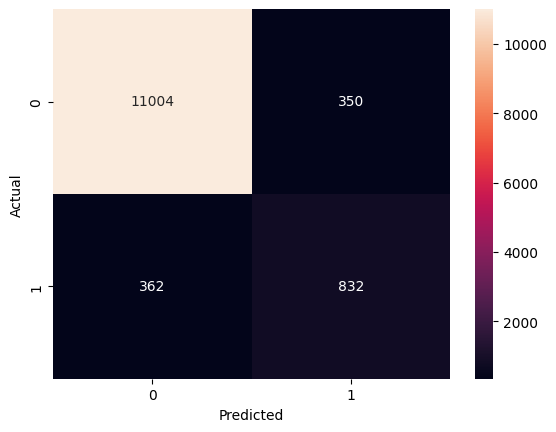

In [10]:
# Create and train the SVM model
model = SVC(kernel='rbf')  # You can also try different kernels like 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions
lr_y_pred = model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", lr_accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
lr_y_pred[:10]

array(['Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [12]:
from sklearn.svm import SVC

Accuracy: 0.9462065667835512
Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.98      0.97     11354
         Yes       0.74      0.67      0.70      1194

    accuracy                           0.95     12548
   macro avg       0.85      0.82      0.84     12548
weighted avg       0.94      0.95      0.94     12548



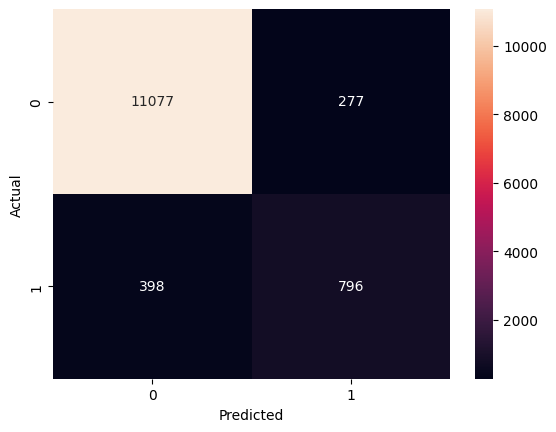

In [13]:
# Create and train the SVM model
model = SVC(kernel='poly', gamma=.1)
model.fit(X_train, y_train)

# Make predictions
lr_y_pred = model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", lr_accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
lr_y_pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [15]:
from sklearn.neural_network import MLPClassifier

# Create MLP classifier with probability estimates enabled
model = MLPClassifier(solver='adam', learning_rate_init=0.01, learning_rate='adaptive', activation='tanh')

# Train the model
model.fit(X_train, y_train)

# Get probability estimates
y_prob = model.predict_proba(X_test)


Accuracy: 0.942859419827861
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11354
           1       0.87      0.47      0.61      1194

    accuracy                           0.94     12548
   macro avg       0.91      0.73      0.79     12548
weighted avg       0.94      0.94      0.94     12548



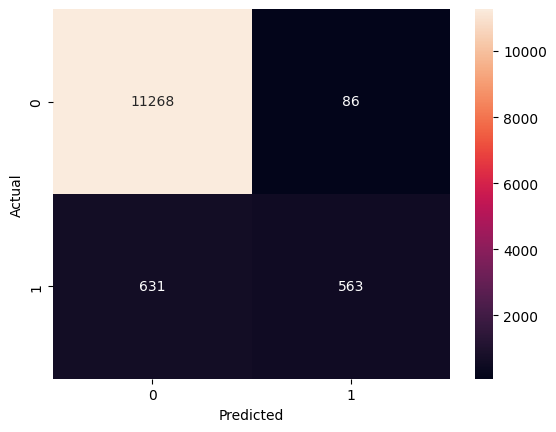

In [16]:
# Convert string labels to integers
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Get predicted classes based on highest probability estimates
y_pred = y_prob.argmax(axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_test_encoded, y_pred)


# Evaluate the model
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Standardize the features (important for KNeighborsClassifier)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Create and train the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Accuracy: 0.9455690149824674


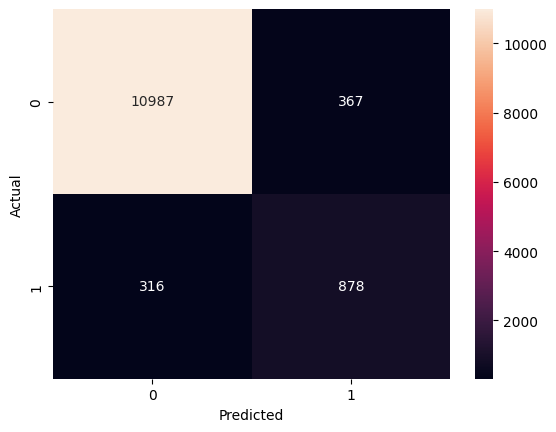

In [30]:
# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
# Create and train the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=200, random_state=42)  # You can adjust the number of estimators (boosting rounds)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

Gradient Boosting Accuracy: 0.9463659547338221
Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.97      0.97     11354
         Yes       0.73      0.70      0.71      1194

    accuracy                           0.95     12548
   macro avg       0.85      0.84      0.84     12548
weighted avg       0.95      0.95      0.95     12548



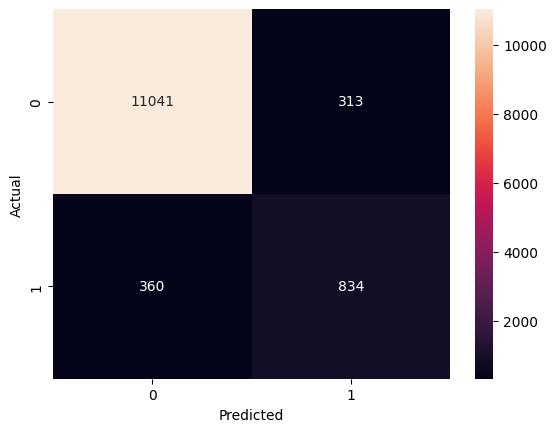

In [31]:
# Make predictions
y_pred = gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
# Create and train the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Accuracy:", accuracy)

Gaussian Naive Bayes Accuracy: 0.9231750079693976


In [26]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Get feature importances (coefficients)
coefficients = logistic_regression.coef_[0]

# Print feature importances
for i, coefficient in enumerate(coefficients):
    print(f"Feature {i}: {coefficient}")


Feature 0: -0.17373174649937706
Feature 1: -0.9587484638009716
Feature 2: -0.14332047373429138
Feature 3: 0.0013466590847301578
Feature 4: 0.819382156145627
Feature 5: -0.52540127633284
Feature 6: 0.005446540391267891
Feature 7: -0.3142156682259523
Feature 8: 0.03272988253809345
Feature 9: -0.032485476012740024
Feature 10: 2.6415927185811623
Feature 11: 0.07111061117372076


c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# save the label encoder to a file
import joblib

joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [33]:
# load the label encoder from a file
_le = joblib.load('label_encoder.pkl')

In [35]:
_le.classes_

array(['Five Children', 'Four Children', 'More than five',
       'Three Children', 'Two Children'], dtype=object)